In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic' # 맑은 고딕 설정
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

In [8]:
df = pd.read_excel('data8/식품첨가물.xlsx')
df.info()
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   연도         115 non-null    int64 
 1   품목명        115 non-null    object
 2   생산능력(T)    115 non-null    object
 3   생산량(T)     115 non-null    object
 4   생산액(천원)    115 non-null    object
 5   국내판매량(T)   115 non-null    object
 6   국내판매액(천원)  115 non-null    object
 7   수출량(T)     115 non-null    object
 8   수출액($)     115 non-null    object
 9   국내점유율(%)   115 non-null    object
 10  국내증가율(%)   115 non-null    object
dtypes: int64(1), object(10)
memory usage: 10.0+ KB



,연도,품목명,생산능력(T),생산량(T),생산액(천원),국내판매량(T),국내판매액(천원),수출량(T),수출액($),국내점유율(%),국내증가율(%)
0,2024,감초추출물,554,29,576189,28,649133,0,230,0.03,8.48
1,2024,글리실리진산이나트륨,6,-,-,-,-,-,-,-,-
2,2024,네오탐(없음),-,-,-,-,-,-,-,-,-
3,2024,락티톨,60,15,151980,15,163900,-,-,0.01,-50.4
4,2024,D-리보오스(없음),-,-,-,-,-,-,-,-,-


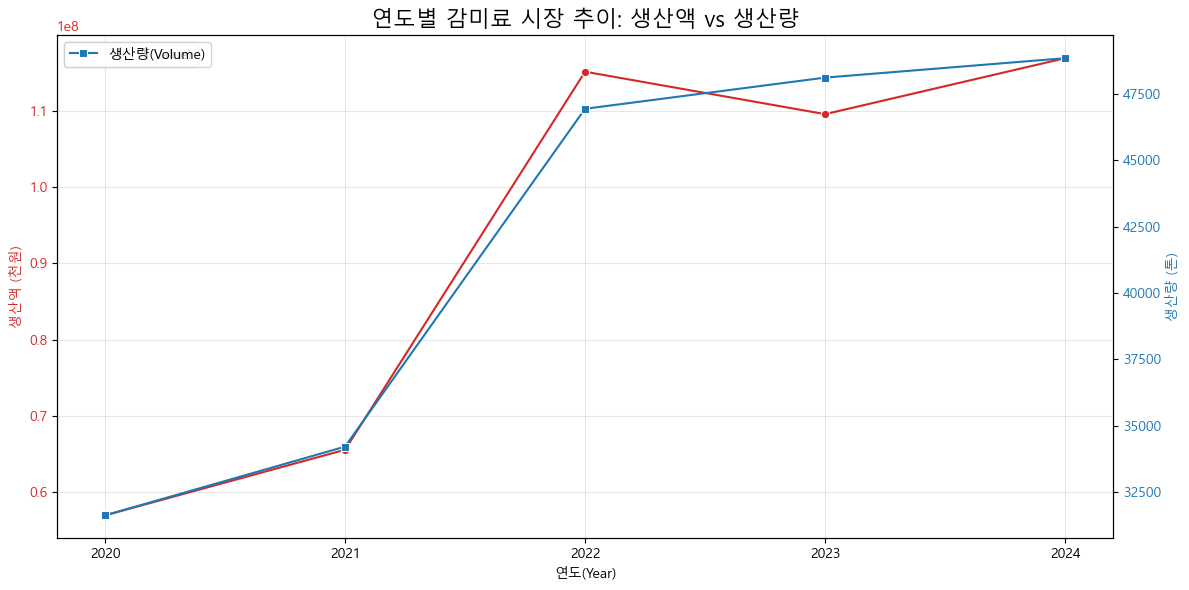

In [16]:

# 1. 데이터 불러오기 및 전처리
file_path = "data8/식품첨가물.xlsx"
df = pd.read_excel(file_path)

cols_to_clean = df.columns.drop(['연도', '품목명'])
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('-', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

yearly_trend = df.groupby('연도')[['생산액(천원)', '생산량(T)']].sum().reset_index()

# 2. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# [왼쪽 축] 생산액 (빨간색)
color_1 = 'tab:red'
ax1.set_xlabel('연도(Year)')
ax1.set_ylabel('생산액 (천원)', color=color_1)
sns.lineplot(data=yearly_trend, x='연도', y='생산액(천원)', ax=ax1, color=color_1, marker='o', label='생산액(Value)')
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(yearly_trend['연도'])

# [오른쪽 축] 생산량 (파란색)
ax2 = ax1.twinx()
color_2 = 'tab:blue'
ax2.set_ylabel('생산량 (톤)', color=color_2)
sns.lineplot(data=yearly_trend, x='연도', y='생산량(T)', ax=ax2, color=color_2, marker='s', label='생산량(Volume)')
ax2.tick_params(axis='y', labelcolor=color_2)


plt.title('연도별 감미료 시장 추이: 생산액 vs 생산량', fontsize=16)
fig.tight_layout()
plt.show()

In [17]:
file_path = "data8/hn24_all.sas7bdat"  # 파일이 있는 경로를 정확히 적어주세요
df = pd.read_sas(file_path, format='sas7bdat')

# 2. 잘 불러와졌는지 확인 (상위 5줄)
print(df.head())

# 3. 우리가 필요한 '당류 섭취량' 데이터만 쏙 뽑아서 보기
print(df[['ID', 'age', 'sex', 'N_SUGAR']].head())

            mod_d             ID       ID_fam    year  region  town_t  apt_t  \
0  b'2025.12.30.'  b'WA35203401'  b'WA352034'  2024.0     1.0     1.0    1.0   
1  b'2025.12.30.'  b'WA35203402'  b'WA352034'  2024.0     1.0     1.0    1.0   
2  b'2025.12.30.'  b'WA35220401'  b'WA352204'  2024.0     1.0     1.0    1.0   
3  b'2025.12.30.'  b'WA35235701'  b'WA352357'  2024.0     1.0     1.0    1.0   
4  b'2025.12.30.'  b'WA35239101'  b'WA352391'  2024.0     1.0     1.0    1.0   

       psu  sex   age  ...      N_CAROT     N_RETIN      N_B1      N_B2  \
0  b'WA35'  2.0  25.0  ...  3882.506065  401.712325  1.492439  2.354416   
1  b'WA35'  1.0  28.0  ...  4331.476087  163.851741  1.392675  1.694273   
2  b'WA35'  2.0  32.0  ...   706.320484   21.443623  0.779928  0.854320   
3  b'WA35'  2.0  30.0  ...  1946.454279  231.771097  1.256558  1.695549   
4  b'WA35'  1.0  33.0  ...  1968.437064  419.769536  1.595112  2.242860   

      N_NIAC    N_FOLATE     N_VITC  LF_secur_y  LF_BUYER  LF_SAFE  